# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2.  線性迴歸訓練資料、測試資料

80%  training data, 20%  testing data ==> 先利用此來驗證各種模型(演算法)的好壞及調好到最佳參數
之後可以利用由這個80%的訓練資料所得的模型後,拿100%資料re-train模型以得到最佳模型 (此model會更佳fit data)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#x,y 資料
x = np.linspace(0, 5, 50)
#print(x)
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)
#print(y)
#切割train及test set=80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)  
#random_state若無設定，則為隨機打亂。
#random_state若有設定，則打亂順序是固定的方式。通常設定為此，是為了固定每次的data set或是具有可複現性
print(x_train)

[4.08163265 1.73469388 1.83673469 0.         2.75510204 3.36734694
 3.67346939 4.28571429 1.02040816 0.30612245 4.18367347 1.32653061
 4.69387755 0.20408163 3.87755102 3.97959184 0.51020408 4.3877551
 3.7755102  3.06122449 0.6122449  2.95918367 1.63265306 1.93877551
 5.         4.48979592 2.14285714 3.26530612 3.46938776 0.71428571
 2.24489796 1.12244898 2.04081633 0.91836735 4.89795918 2.85714286
 3.16326531 1.53061224 2.65306122 3.57142857]


In [12]:
y_train

array([6.42869894, 2.26453061, 3.44246414, 0.17038971, 4.48063341,
       4.58567884, 5.19466217, 6.09855797, 1.7887802 , 1.07199511,
       5.03705468, 2.35511681, 5.81655564, 0.53973857, 5.54179541,
       4.57463221, 0.51385912, 5.81936521, 5.33918686, 4.87318806,
       1.31350487, 3.80688915, 3.41083479, 2.40769157, 6.54877233,
       5.67982452, 3.80555191, 5.31832004, 4.85954874, 1.49387684,
       3.6913424 , 2.25279277, 2.99774844, 2.55909395, 6.99182561,
       4.16139351, 4.59446062, 2.65618628, 4.42392978, 4.09236344])

In [9]:
y #對應x的資料及順序

array([0.17038971, 1.2574952 , 0.53973857, 1.07199511, 1.40669152,
       0.51385912, 1.31350487, 1.49387684, 1.27444986, 2.55909395,
       1.7887802 , 2.25279277, 1.52201166, 2.35511681, 1.9711018 ,
       2.65618628, 3.41083479, 2.26453061, 3.44246414, 2.40769157,
       2.99774844, 3.80555191, 3.6913424 , 3.05432123, 4.19714523,
       3.66451632, 4.42392978, 4.48063341, 4.16139351, 3.80688915,
       4.87318806, 4.59446062, 5.31832004, 4.58567884, 4.85954874,
       4.09236344, 5.19466217, 5.33918686, 5.54179541, 4.57463221,
       6.42869894, 5.03705468, 6.09855797, 5.81936521, 5.67982452,
       6.14918623, 5.81655564, 6.25908321, 6.99182561, 6.54877233])

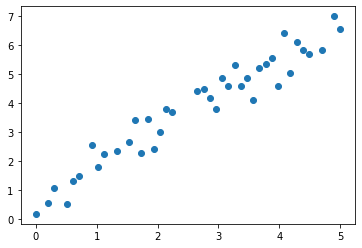

In [13]:
#training資料分布狀況
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [14]:
#先將線性回歸程式assign至regr
regr = LinearRegression()
#記得資料要由1D改為2D
X_train = x_train.reshape(-1,1)
#將轉換後的X_train資料及實際的y_train結果，丟給機器學習
regr.fit(X_train,y_train)
print('Coefficients: ', regr.coef_) #斜率
print('interception: ', regr.intercept_) #截距

Coefficients:  [1.20286682]
interception:  0.6890252466543356


In [15]:
#將X_train資料丟進機器預測的式子內
Y_train = regr.predict(X_train)

In [16]:
#MSE(mean square error)是衡量predict結果好不好的指標=> (總和(predict Y - real Y)^2)/總筆數
mse = np.sum((Y_train-y_train)**2) / len(y_train)
print(mse)

0.21695083790985353


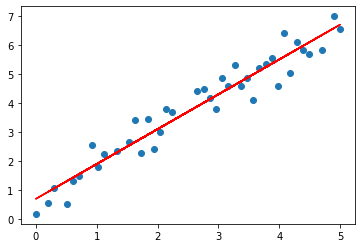

In [17]:
plt.scatter(x_train, y_train) #原始training data set的散布圖
plt.plot(x_train, Y_train, 'r') #model predict出來的曲線 (x_train, f(x_train)=Y_train)

#### test with test data

In [19]:
#一樣，將x_test reshape由1D轉為2D
X_test = x_test.reshape(-1,1)
#將X_test丟進去predict的結果裡，得到的會是Predict Y_test
Y_test = regr.predict(X_test)

#80/20，共50筆，理應有10筆test data set
print(Y_test)

[2.16192339 2.40740642 1.17999129 1.67095734 6.21239329 0.81176676
 3.75756305 3.63482154 6.45787631 3.51208002]


$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [20]:
#也可以將上面所取得的Coef和intercept直接寫成方程式帶入X_test。所得到的結果要是一樣的。
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b


array([[2.16192339],
       [2.40740642],
       [1.17999129],
       [1.67095734],
       [6.21239329],
       [0.81176676],
       [3.75756305],
       [3.63482154],
       [6.45787631],
       [3.51208002]])

In [21]:
#通常test data set的MSE會差於training data set =>因為資料是沒看過的。
#不過滿lucky的，居然MSE_test < MSE_train
mse = np.sum((Y_test-y_test)**2) / len(y_test)
print(mse)

0.15850563386728111


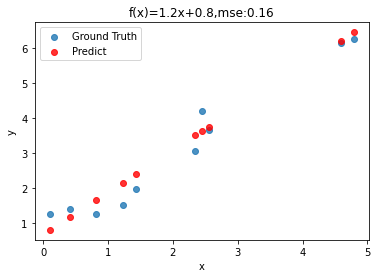

In [22]:
#作圖
title='f(x)=1.2x+0.8'+',mse:'+str(round(mse,2)) #取至小數點第二位
plt.title(title) #上方座標
plt.xlabel('x') #橫坐標標題
plt.ylabel('y') #縱坐標標題
#plt.grid(True)
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth') #實際結果y_test
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict') #Predict結果Y_test
plt.legend()